In [96]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [97]:
pd.set_option('display.max_rows', 500)

In [98]:
df=pd.read_csv(r'C:\Users\Администратор\Desktop\REAskills2021\train.csv')
df=df.drop('Unnamed: 0', axis=1)


def obj_handle(df):
    for col in ['MSSubClass', 'YrSold', 'MoSold']:
        df[col] = df[col].astype(object)
    return df




def most_common(lst):
    return max(set(lst), key=lst.count)
def na_handler(df):
    df['PoolQC']=df['PoolQC'].fillna('No Pool')
    df['MiscFeature']=df['MiscFeature'].fillna('noAdd')
    df['Alley']=df['Alley'].fillna('NoAccess')
    df['Fence']=df['Fence'].fillna('NoFence')
    df['FireplaceQu']=df['FireplaceQu'].fillna('NoFireplace')
    df['GarageCond']=df['GarageCond'].fillna('noG')
    df['BsmtExposure']=df['BsmtExposure'].fillna('NoB')
    df['MasVnrType']=df['MasVnrType'].fillna('noM')
    df['Electrical']=df['Electrical'].fillna(most_common(df['Electrical'].tolist()))
    return df




def float_handle(dff):
    dff['LotAreaAdditional']=dff['LotAreaAdditional'].fillna(0)
    dff=dff.drop('YearReconstruction',axis=1)
    dff=dff.drop('Variable01',axis=1)
    dff=dff.drop('Variable02',axis=1)
    dff=dff.drop('Variable03',axis=1)
    dff=dff.drop('Variable04',axis=1)
    dff['3rdFlrSF']=dff['3rdFlrSF'].fillna(0)
    dff['LotFrontage']=dff['LotFrontage'].fillna(dff['LotFrontage'].mean())
    dff['GarageYrBlt']=dff['GarageYrBlt'].fillna(min(dff['GarageYrBlt']))
    dff['MasVnrArea']=dff['MasVnrArea'].fillna(0)
    return dff
def years_to_age(dff):
    dff['YearBuilt']=dff['YearBuilt'].apply(lambda x: 2010-x)
    dff['YearRemodAdd']=dff['YearRemodAdd'].apply(lambda x: 2010-x)
    dff['GarageYrBlt']=dff['GarageYrBlt'].apply(lambda x: 2010-x)
    return dff
df=obj_handle(df)
df=float_handle(df)
df=na_handler(df)
df['OverallQual']=df['OverallQual'].astype('str').apply(lambda x: ''.join([i for i in x if i not in '!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~']) )
df['OverallQual']=df['OverallQual'].astype('float')
df_obj=df.select_dtypes(include=['object'])
corr_mat = df.corr()


In [99]:
df_obj['SalePrice']=df['SalePrice']

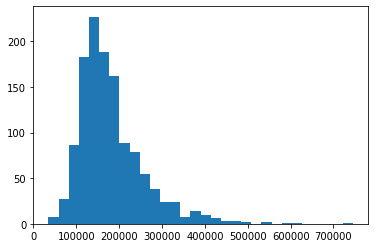

In [100]:
# ОСТАВЛЯЕМ
import matplotlib.pyplot as plt
_ = plt.hist(df_obj['SalePrice'],bins=30)


(array([  2.,   1.,   0.,   1.,   3.,   5.,   3.,   5.,  37.,  29.,  43.,
         76., 118., 150., 124., 136., 131.,  85.,  94.,  55.,  46.,  37.,
         17.,  22.,  11.,   4.,   2.,   2.,   1.,   1.]),
 array([10.46024211, 10.56227202, 10.66430193, 10.76633185, 10.86836176,
        10.97039167, 11.07242159, 11.1744515 , 11.27648141, 11.37851132,
        11.48054124, 11.58257115, 11.68460106, 11.78663098, 11.88866089,
        11.9906908 , 12.09272072, 12.19475063, 12.29678054, 12.39881045,
        12.50084037, 12.60287028, 12.70490019, 12.80693011, 12.90896002,
        13.01098993, 13.11301985, 13.21504976, 13.31707967, 13.41910958,
        13.5211395 ]),
 <BarContainer object of 30 artists>)

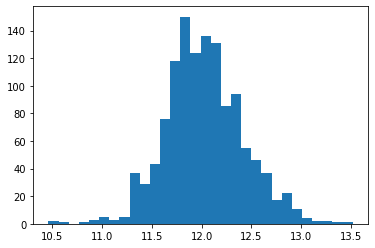

In [101]:
plt.hist(np.log(df_obj['SalePrice']),bins=30)

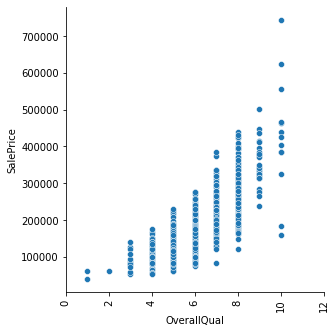

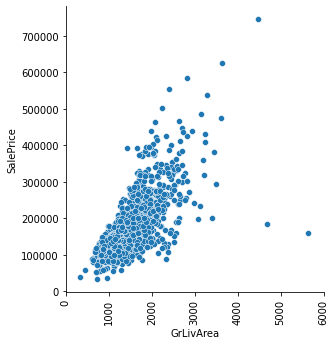

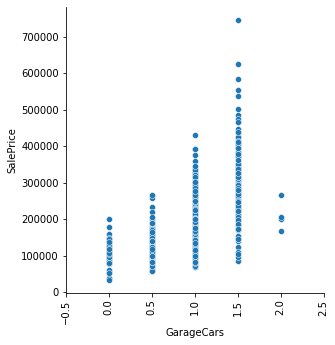

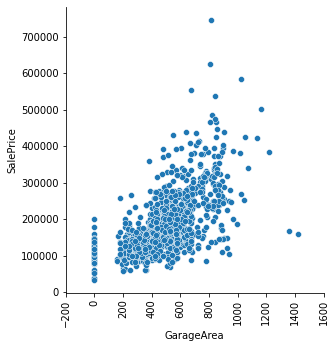

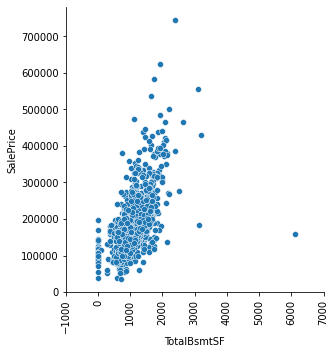

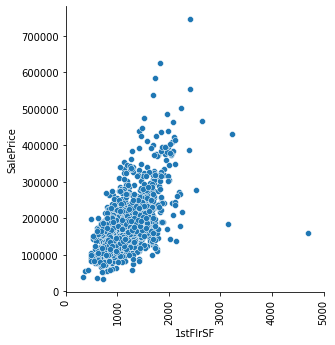

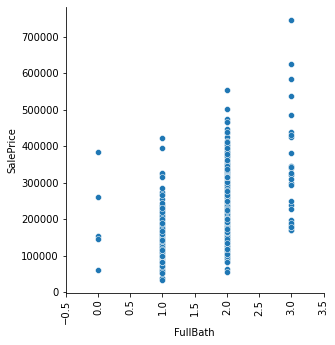

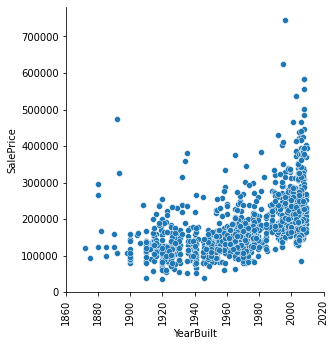

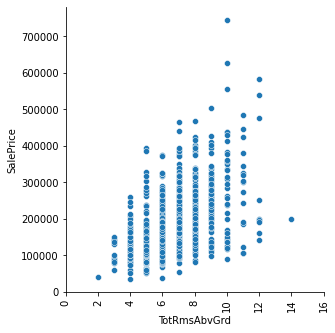

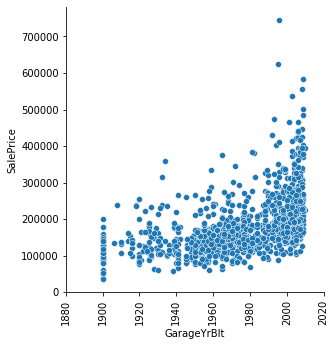

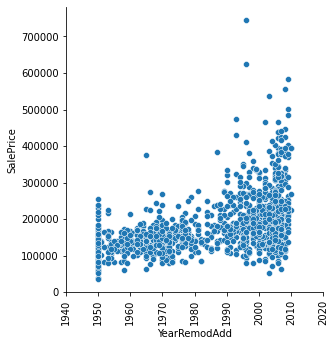

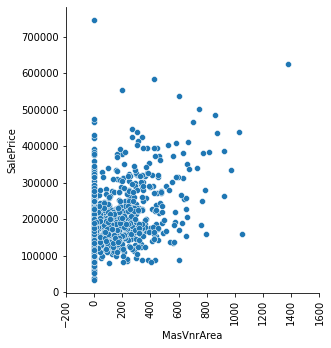

In [102]:
# Тут надо отобрать
mask=corr_mat['SalePrice'].nlargest(13).index.tolist()
for element in mask[1:]:
    re_plot = sns.relplot(y="SalePrice", x= element, legend="full", data=df[mask], height=4.5, aspect=3 / 3,);
    re_plot.set_xticklabels(rotation=90)

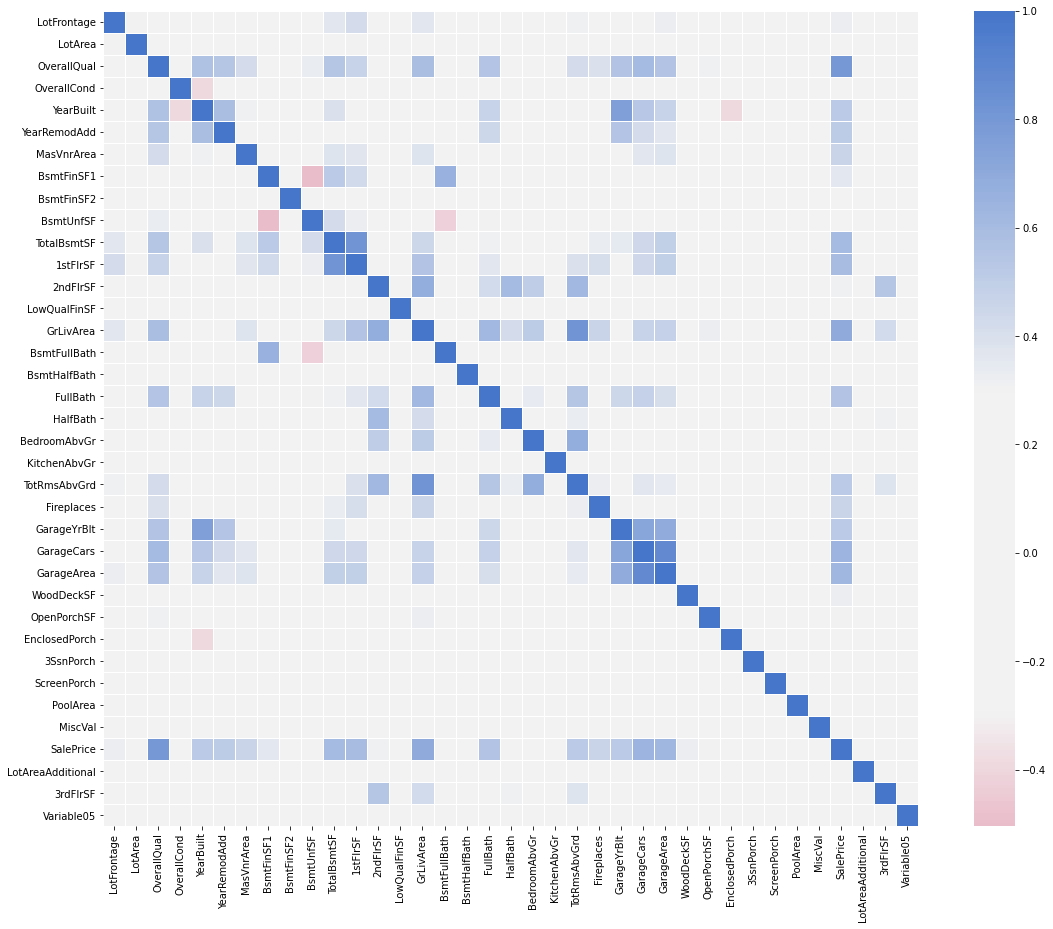

In [52]:
# Оставляем
corr_mat = df.corr()
cmap = sns.diverging_palette(0,255,sep=77, as_cmap=True)
plt.subplots(figsize=(20,15))

sea.heatmap(corr_mat, cmap=cmap, center=0,
            square=True, linewidths=0.5)
plt.show()

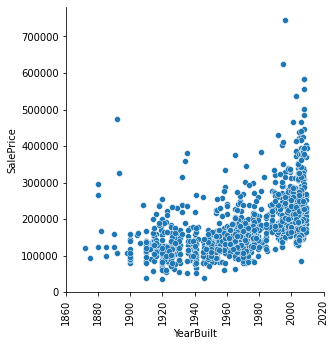

In [35]:
# Оставляем
re_plot = sns.relplot(y="SalePrice", x= 'YearBuilt', legend="full", data=df, height=4.5, aspect=3 / 3,);
re_plot.set_xticklabels(rotation=90)

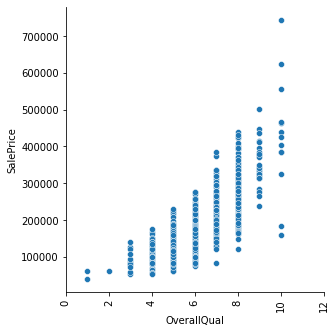

In [36]:
# Оставляем
re_plot = sns.relplot(y="SalePrice", x= 'OverallQual', legend="full", data=df, height=4.5, aspect=3 / 3,);
re_plot.set_xticklabels(rotation=90)